PLL (Phase Locked Loop): control system that generates an output signal that has the phase related to the phase of an input signal. <br>
used in signal demodulation, recovering signal from a noisy communication channel generate a stable frequency at multiples of an input frequency (frequency synthesis), or distribute precisely timed clock pulses in digital logic circuits such as microprocessors. <br>

Phase detector - LP filter - Voltage controlled oscillator - feedback path



In [113]:
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import signal
from scipy.fft import fft, fftfreq

from ipywidgets import interact
import ipywidgets as widgets

In [114]:
class PLL(object):
    def __init__(self, f0, D, k, w0):
        """
        initialize the state of PLL
        """

        self.f0 = f0 
        self.T = T
        self.k = k

        tau1 = k/(w0**2)
        tau2 = 2*D/w0 - 1/k

        self.a1 = -(T-2*tau1)/(T+2*tau1)
        self.b0 = (T+2*tau2)/(T+2*tau1)
        self.b1 = (T-2*tau2)/(T+2*tau1)

        self.sin_table = np.sin(2*np.pi*np.linspace(0,1, 1024))


        self.acc = 0
    
    def pll(self, x):
        """
        x : input function
        """

        z = np.zeros(x.size)
        v = np.zeros(x.size)
        y = np.zeros(x.size)
        
        for n in range(1, x.size):
            z[n] = x[n]*y[n]
            v[n] = self.a1 * v[n-1] + self.b0 * z[n] + self.b1*z[n-1]

            self.acc = self.acc +self.f0 - (self.k*v[n]/(2*np.pi))
            
            self.acc = self.acc- np.floor(self.acc)
            
            y[n] = self.sin_table[np.int(np.floor(1024*self.acc))]
            
        return y





        

In [115]:
Nb = 10
Ns = 100
f0 = 0.1
k = 1
D = 1
w0 = 2*np.pi/100
T= 1


state_pll = PLL(f0, D, k, w0)

t = np.linspace(0,1,1000)
x = np.cos(2*np.pi*10*t)

xb = np.reshape(x,(Nb, Ns))
yb = np.zeros((Nb,Ns))
for j in range(Nb):
    yb[j] = state_pll.pll(xb[j])
yb = np.reshape(yb, Nb*Ns)


fig = go.Figure()
fig.add_trace(go.Scatter(y = x))
fig.add_trace(go.Scatter(y = yb))
fig

ValueError: could not broadcast input array from shape (1000) into shape (100)

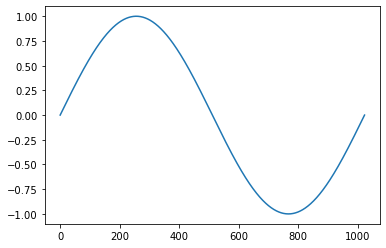

In [96]:
plt.plot(np.sin(2*np.pi*f0*np.linspace(0,1/f0, 1024)))
